# Data Analysis homework 1
by Skander Chouchene

In [87]:
# import necessary libraries
import pandas as pd # pandas
import seaborn as sns # seaborn package to generate nice plots
import matplotlib.pyplot as plt # matplotlib
import numpy as np # numpy
import scipy.stats as stats

In [166]:
# read data
data=pd.read_csv('tn_stock_data_2018.csv')
# convert date from string to datetime type
data.date=pd.to_datetime(data.date,format='%d/%m/%y')

In [167]:
data.head()

,date,C_GR_RLC,company_code,company,ref_price,yesterday_price,open,last,close,low,high,qty_traded,num_trades,value,I
0,2018-01-02,11,725001,ADWYA,5.35,5.35,5.25,5.39,5.39,5.25,5.39,2926,7,15635.50,NaN
1,2018-01-02,11,340005,AMEN BANK,24.35,24.35,24.38,24.00,24.00,24.00,24.38,1519,12,36918.00,NaN
2,2018-01-02,11,730001,ARTES,6.27,6.20,6.27,6.10,6.10,6.09,6.27,35875,67,219020.05,NaN
3,2018-01-02,11,714001,ASSAD,9.00,9.00,0.00,0.00,9.00,0.00,0.00,0,0,NaN,NaN
4,2018-01-02,11,360035,ATB,4.22,4.22,4.15,4.18,4.18,4.15,4.18,3705,7,15465.90,NaN


In [169]:
len(data.company.unique())

84

In [170]:
# calculate daily return for every company
data['currReturn']=data.groupby(['company'])['close'].pct_change()
# shift to get next day's returns
data['nextReturn']=data.groupby(['company'])['currReturn'].shift(-1)

In [168]:
data=data.drop("I",axis=1)

In [172]:
data=data.replace([np.inf, -np.inf], np.nan)

In [173]:
data=data.dropna()

# I/ Correlated features (excluding nextReturn)
--------

### 1) Let's start with the pairplot to see how variables behave in connection to each other

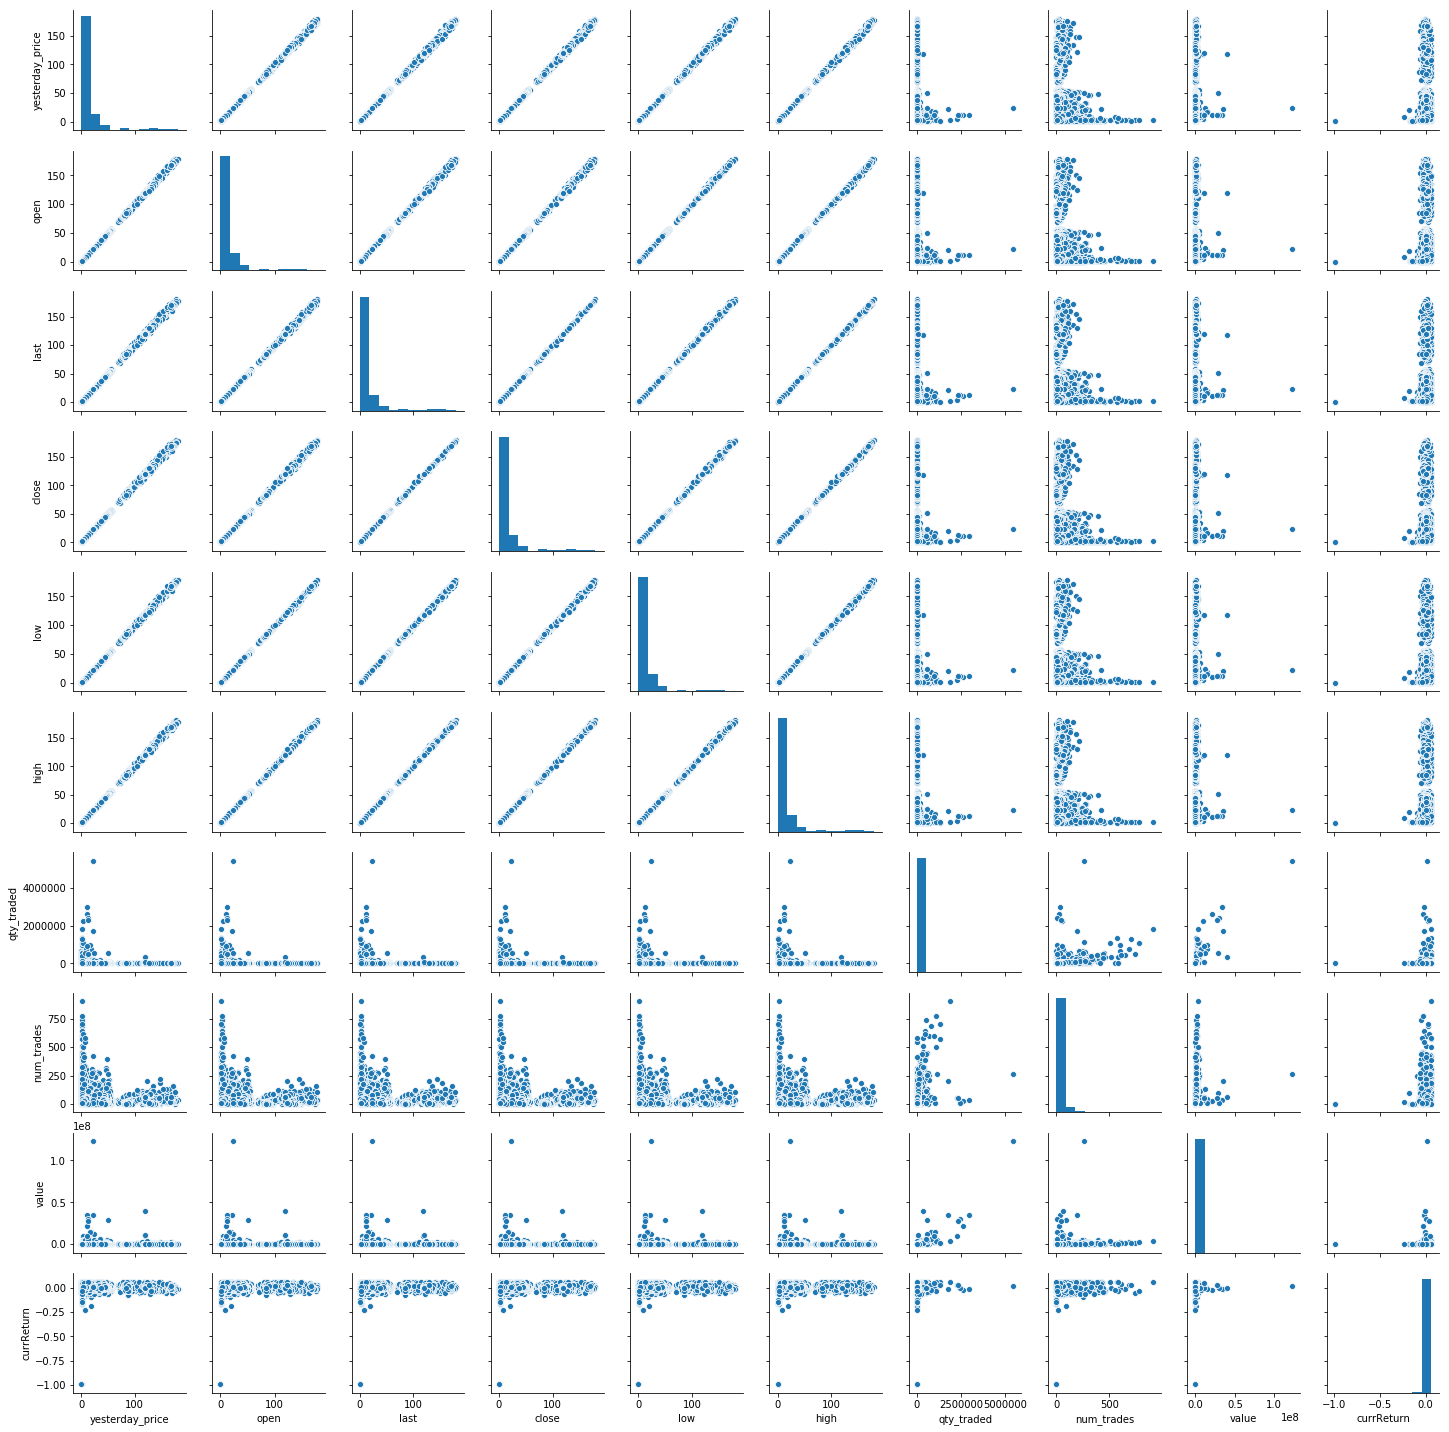

In [177]:
sns.pairplot(data[['yesterday_price', 'open', 'last', 'close', 'low', 'high', 'qty_traded', 'num_trades', 'value','currReturn']],height=2);

### -> Observations
The pairplot can give us an idea on which variables are linearly correlated. The variables 'open','last','close','high', 'low', 'yesterday_price' and 'ref_price' have a strong linear relationship, which makes sense seeing as these prices are extremely close and that they vary slightly throughout the day.

qty_traded and value seem to be linearly correlated as well. Same as qty_traded and num_trades (the more trade operations you make, the more quantity of stocks you trade and the more capital is traded).


### 2) Correlation matrix to confirm the results of the pairplot

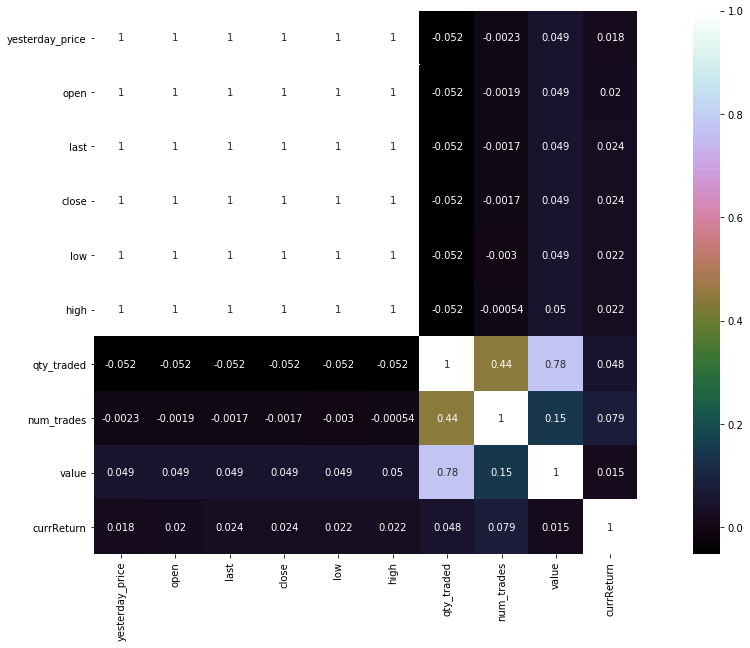

In [178]:
needed_data=data[['yesterday_price', 'open', 'last', 'close', 'low', 'high', 'qty_traded', 'num_trades', 'value','currReturn']]
corr_mat=needed_data.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

### -> Interpretations

The correlation matrix gives us a beautiful and accessible insight to variable correlation. It confirms the results we speculated above in the pairplot:

1) ref_price, yesterday_price, open, close, last, high and low are all highly linearly correlated. This is basically beacause the price does not vary largely in one day, or between two days.

2) value and qty_traded are highly linearly correlated. Intuitively, value,qty_traded and num_trades are realted. As num_trades defines the traded quantity and the traded quantity defines the value of the traded capital for that day. However, there is less correlation between num_trades and value as each trade operation differs in the number of traded stocks.

# II/ Data visualization for UIB
--- 

### 1) Descriptive visuals

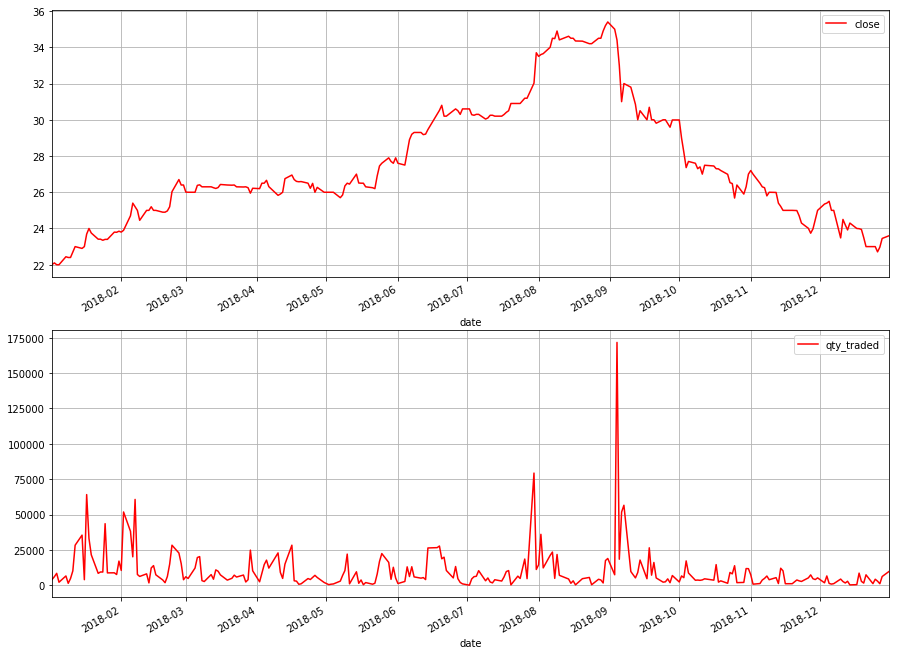

In [65]:
# let's see the price paths for this company and the qty traded
fig,ax=plt.subplots(2,1,figsize=(15,12))
data[data.company=='UIB'].plot(x='date',y='close',grid=True,ax=ax[0], color='red');
data[data.company=='UIB'].plot(x='date',y='qty_traded',grid=True,ax=ax[1], color='red');

### -> Interpretations
Through the plots of the closing price and the traded quantity in 2018, we can see that September was the peak of stock trading for UIB. This may be due to the good performance in the first semester of 2018.

https://www.espacemanager.com/uib-bonnes-performances-au-premier-semestre-2018.html

{'whiskers': [<matplotlib.lines.Line2D at 0x181faab1390>,
 'caps': [<matplotlib.lines.Line2D at 0x18189bd3518>,
 'boxes': [<matplotlib.lines.Line2D at 0x181faab12b0>],
 'medians': [<matplotlib.lines.Line2D at 0x18189bd3278>],
 'fliers': [<matplotlib.lines.Line2D at 0x18189bd32b0>],
 'means': []}

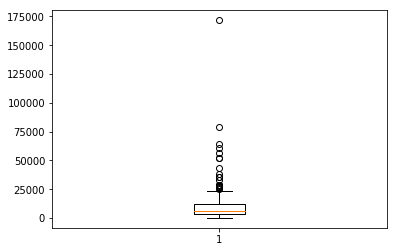

In [254]:
plt.boxplot(data[data.company=='UIB'].qty_traded)

In [255]:
data[data.company=='UIB'][data.qty_traded>150000].date

C:\Users\ALEX\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


14075   2018-09-04
Name: date, dtype: datetime64[ns]

### -> Observations
UIB's traded quantities are usually in the 1000s. However some outliers did happen, the highest being around 175000. This number occured on 04-09-2018 which marked the peak of UIB's trade operations.

http://kapitalis.com/tunisie/2018/09/04/bourse-de-tunis-lindice-tunindex-en-repli-de-074/

###        2) Let's compare UIB to other companies (banks)

In [271]:
banks=['BIAT','BH','BT','STB','AMEN BANK','BNA','UBCI','UIB']
bank_data=data[data['company'].isin(banks)]

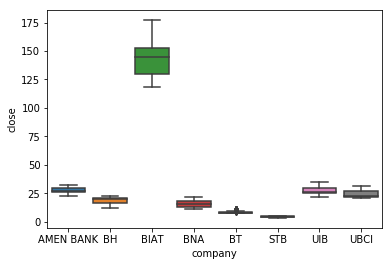

In [267]:
sns.boxplot(bank_data.company,bank_data.close)

#### It seems that BIAT outstrips every other bank in the closing price by a large margin so it's better to remove it from the list

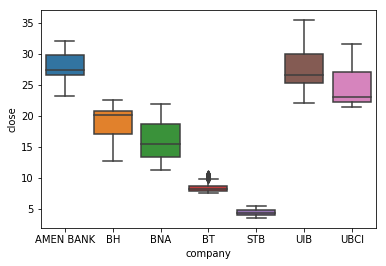

In [283]:
#plotting company VS closing price
banks=['BH','BT','STB','AMEN BANK','BNA','UBCI','UIB']
bank_data=data[data['company'].isin(banks)]
sns.boxplot(bank_data.company,bank_data.close)

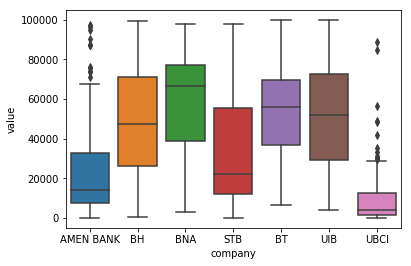

In [284]:
##plotting company VS value traded
bank_data_no_outliers=bank_data[bank_data.value<100000]
sns.boxplot(bank_data_no_outliers.company,bank_data_no_outliers.value)

### ->Observations
This boxplot is clearer after we got rid of the outlier (BIAT). We can see that UIB is doing better than other banks in terms of stock price. AMEN BANK has a higher median, yet UIB has a higher 75% percentile.

As for the value, UIB has the 3rd highest medianand the 2nd highest 75% percentile. It is on the same level as BT and BNA

# III/ Which factors influence the next day's return ?
---
    In this part, we will try to determine the factors that influence the variable nextReturn. To make the task less cumbersome, we will not use 'open','last','low' and 'high' as they are highly linearly correlated with 'close'.

### 1) Checking nextReturn for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x181f821eb70>,
 'caps': [<matplotlib.lines.Line2D at 0x181f821ef98>,
 'boxes': [<matplotlib.lines.Line2D at 0x181f821e780>],
 'medians': [<matplotlib.lines.Line2D at 0x181f82288d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x181f8228c18>],
 'means': []}

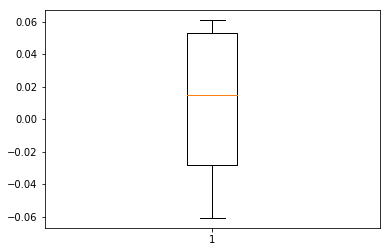

In [38]:
plt.boxplot(data.nextReturn)

### -> Interpretation
We can see there are no outliers in nextReturn (same for currReturn of course), which is logical as the return is not expected to vary wildly, except in case of an unpredicted event that will have a big impact on the stock market.

### 2) Variables that nextReturn depends on

In [191]:
from scipy.stats import pearsonr

In [240]:
mask=np.ones((6,6))
mask[:,0]=[0,0,0,0,0,0]
mask

array([[0., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.]])

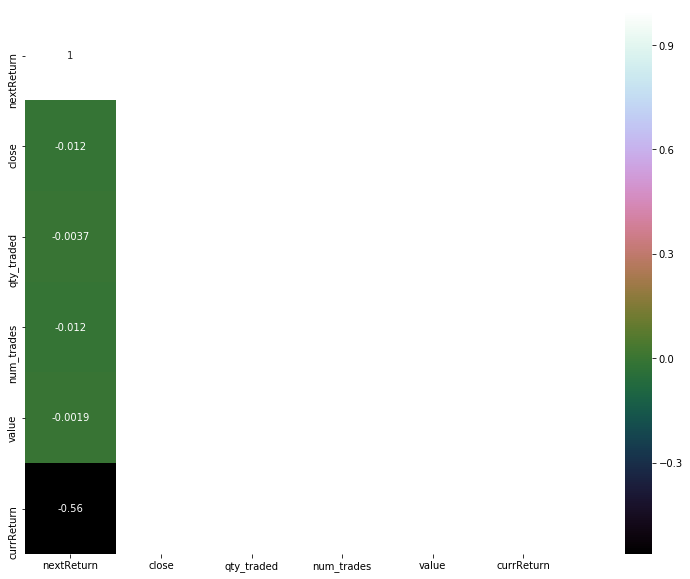

In [249]:
needed_data=data[['nextReturn','close', 'qty_traded', 'num_trades', 'value','currReturn']]
corr_mat=needed_data.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix',mask=mask)

### -> Interpretation
From the pearson correlation matrix, we can see that currReturn and nextReturn are linearly correlated. And nothing else seems to affect it. However, seeing as currReturn is the percentage change of the closing price between two days, we can say that the closing price affects the next return indirectly.